In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import xlrd

In [2]:
loc = '../HaulCycle-V5/ModelSettings.xlsx'
wb = xlrd.open_workbook(loc)
sn = wb.sheet_by_name('Nodes')
sp = wb.sheet_by_name('Paths')
number_of_nodes = sn.nrows
number_of_segments = sp.nrows

In [18]:
G = nx.Graph()

for row in range(1,number_of_nodes):
    G.add_node(int(sn.cell(row,0).value))
    
for row in range(1,number_of_segments):
    G.add_edge(int(sp.cell(row,1).value),int(sp.cell(row,2).value))

subgraphs = list(G.subgraph(c) for c in nx.connected_components(G))

<ipython-input-19-3ccc3c2dbcfb>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(str(i)+'.png', dpi=100, figsize=(50, 50))


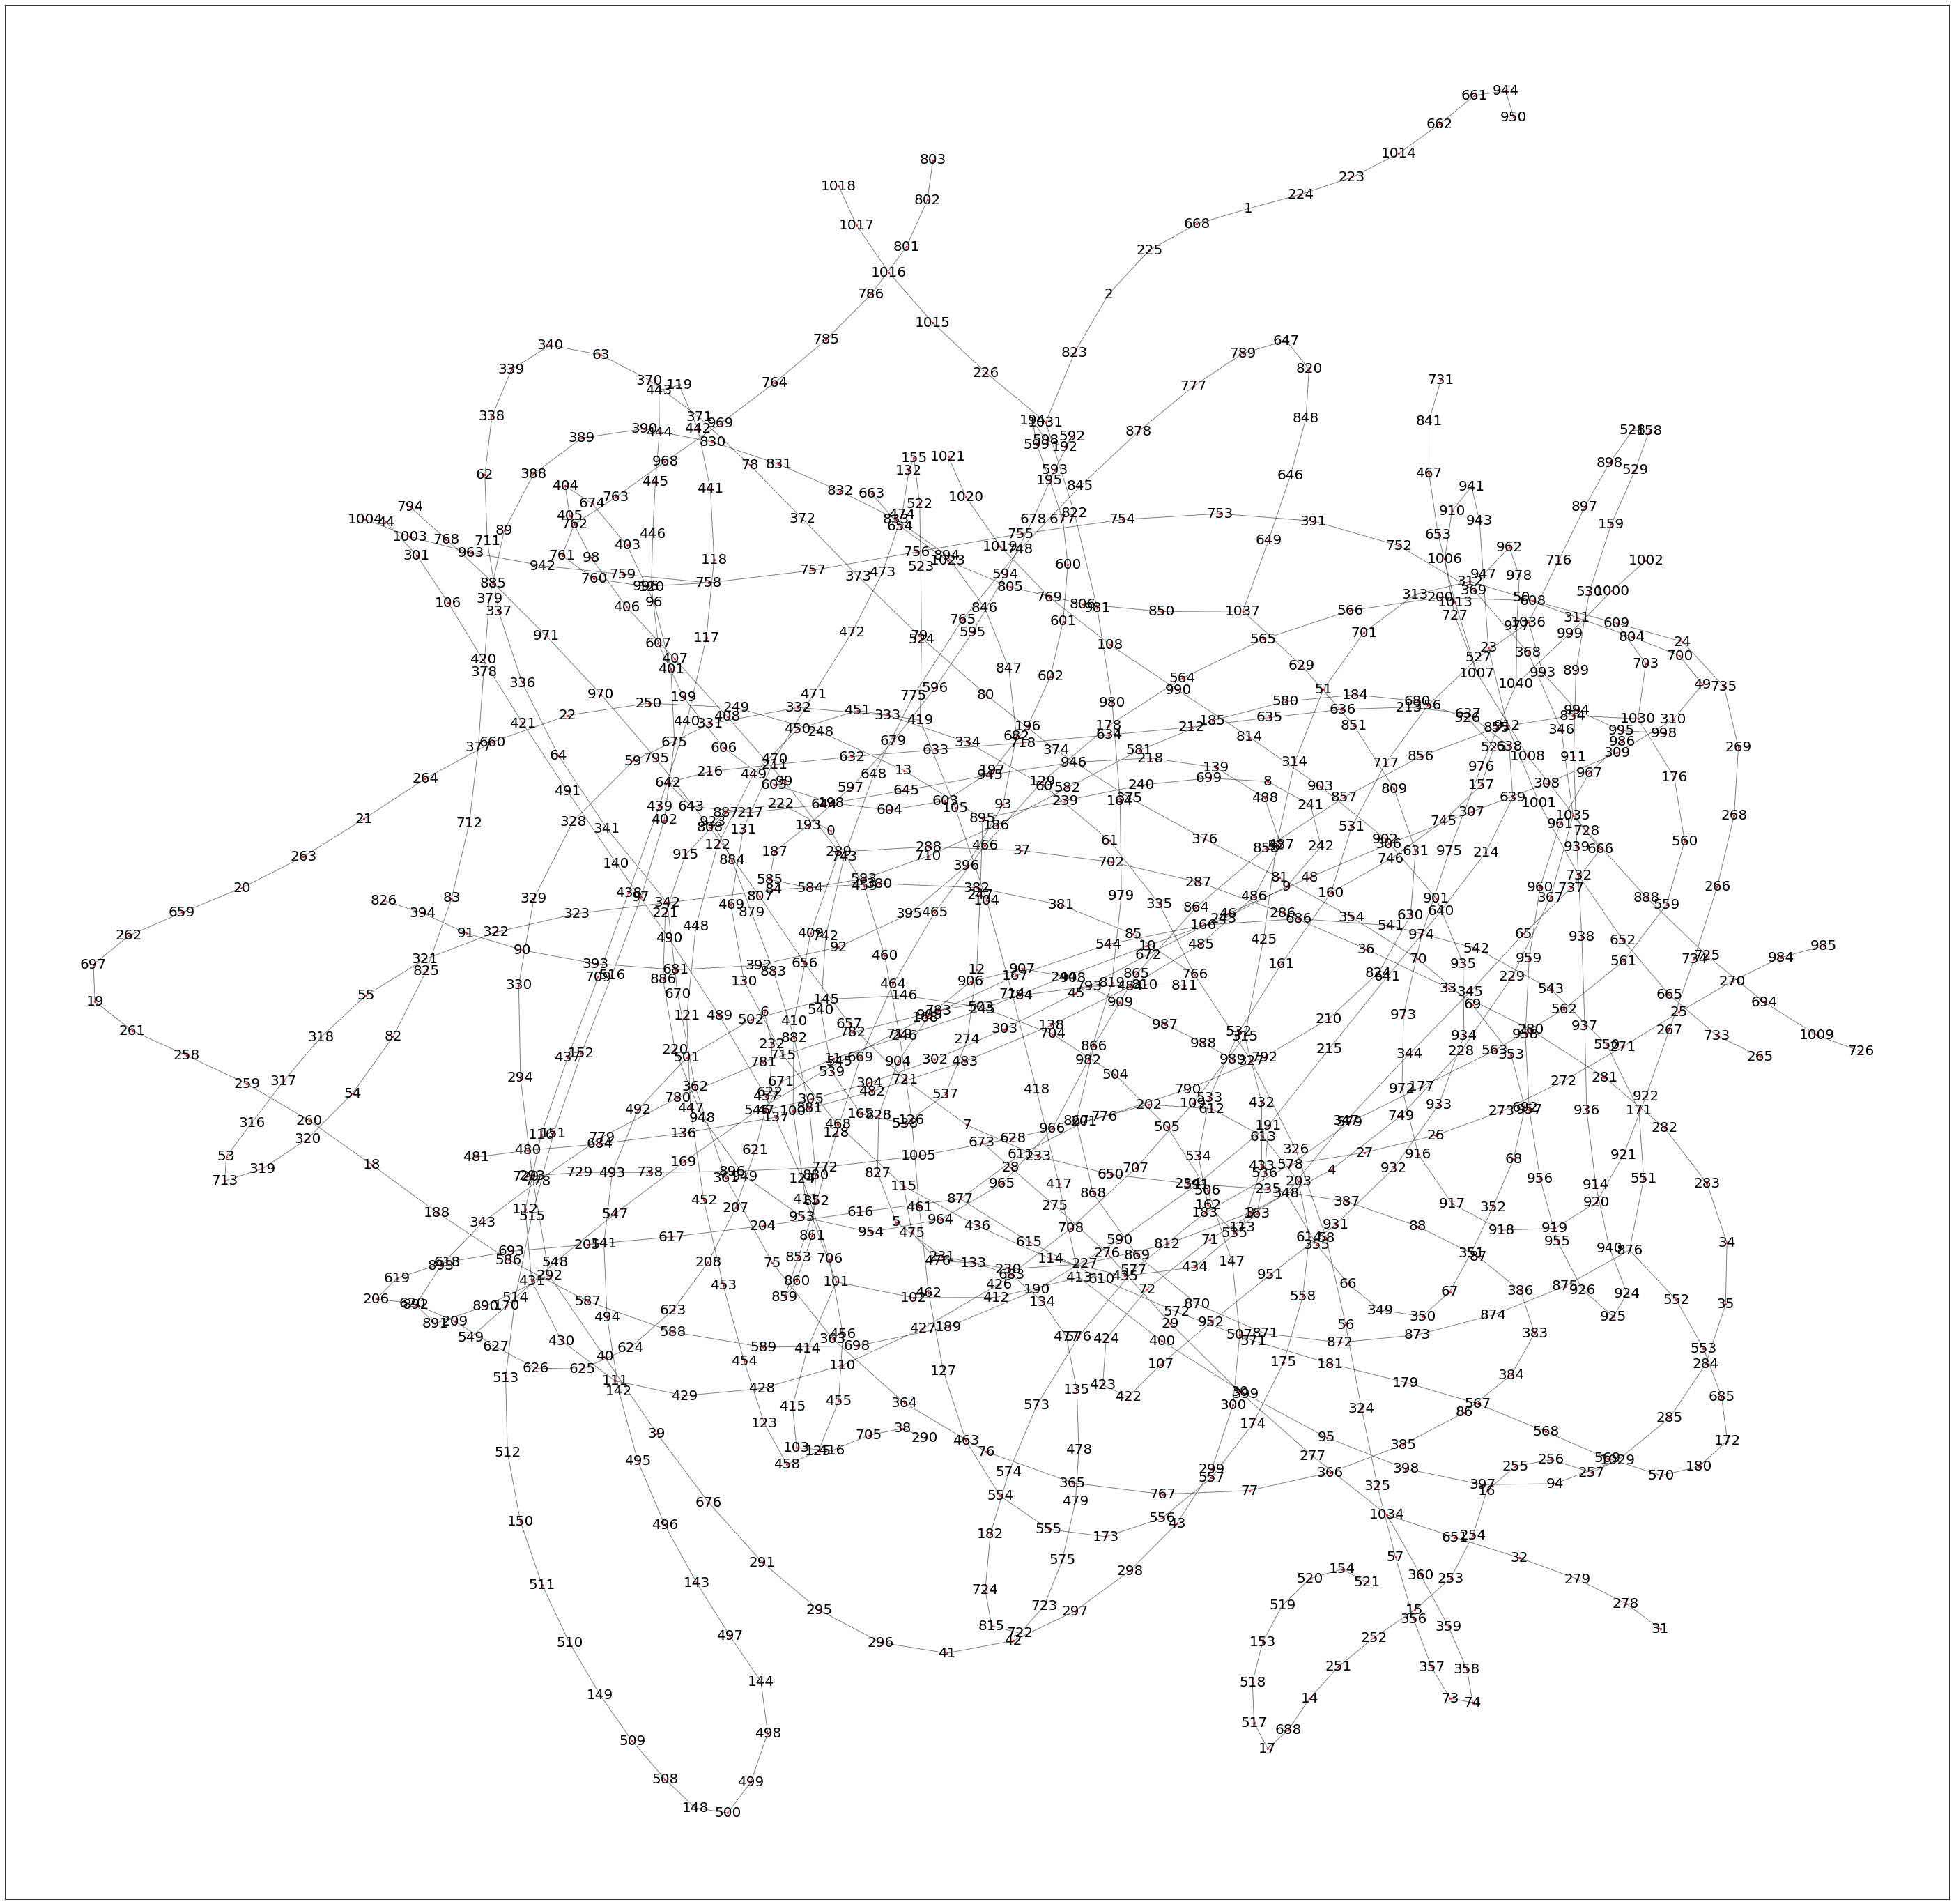

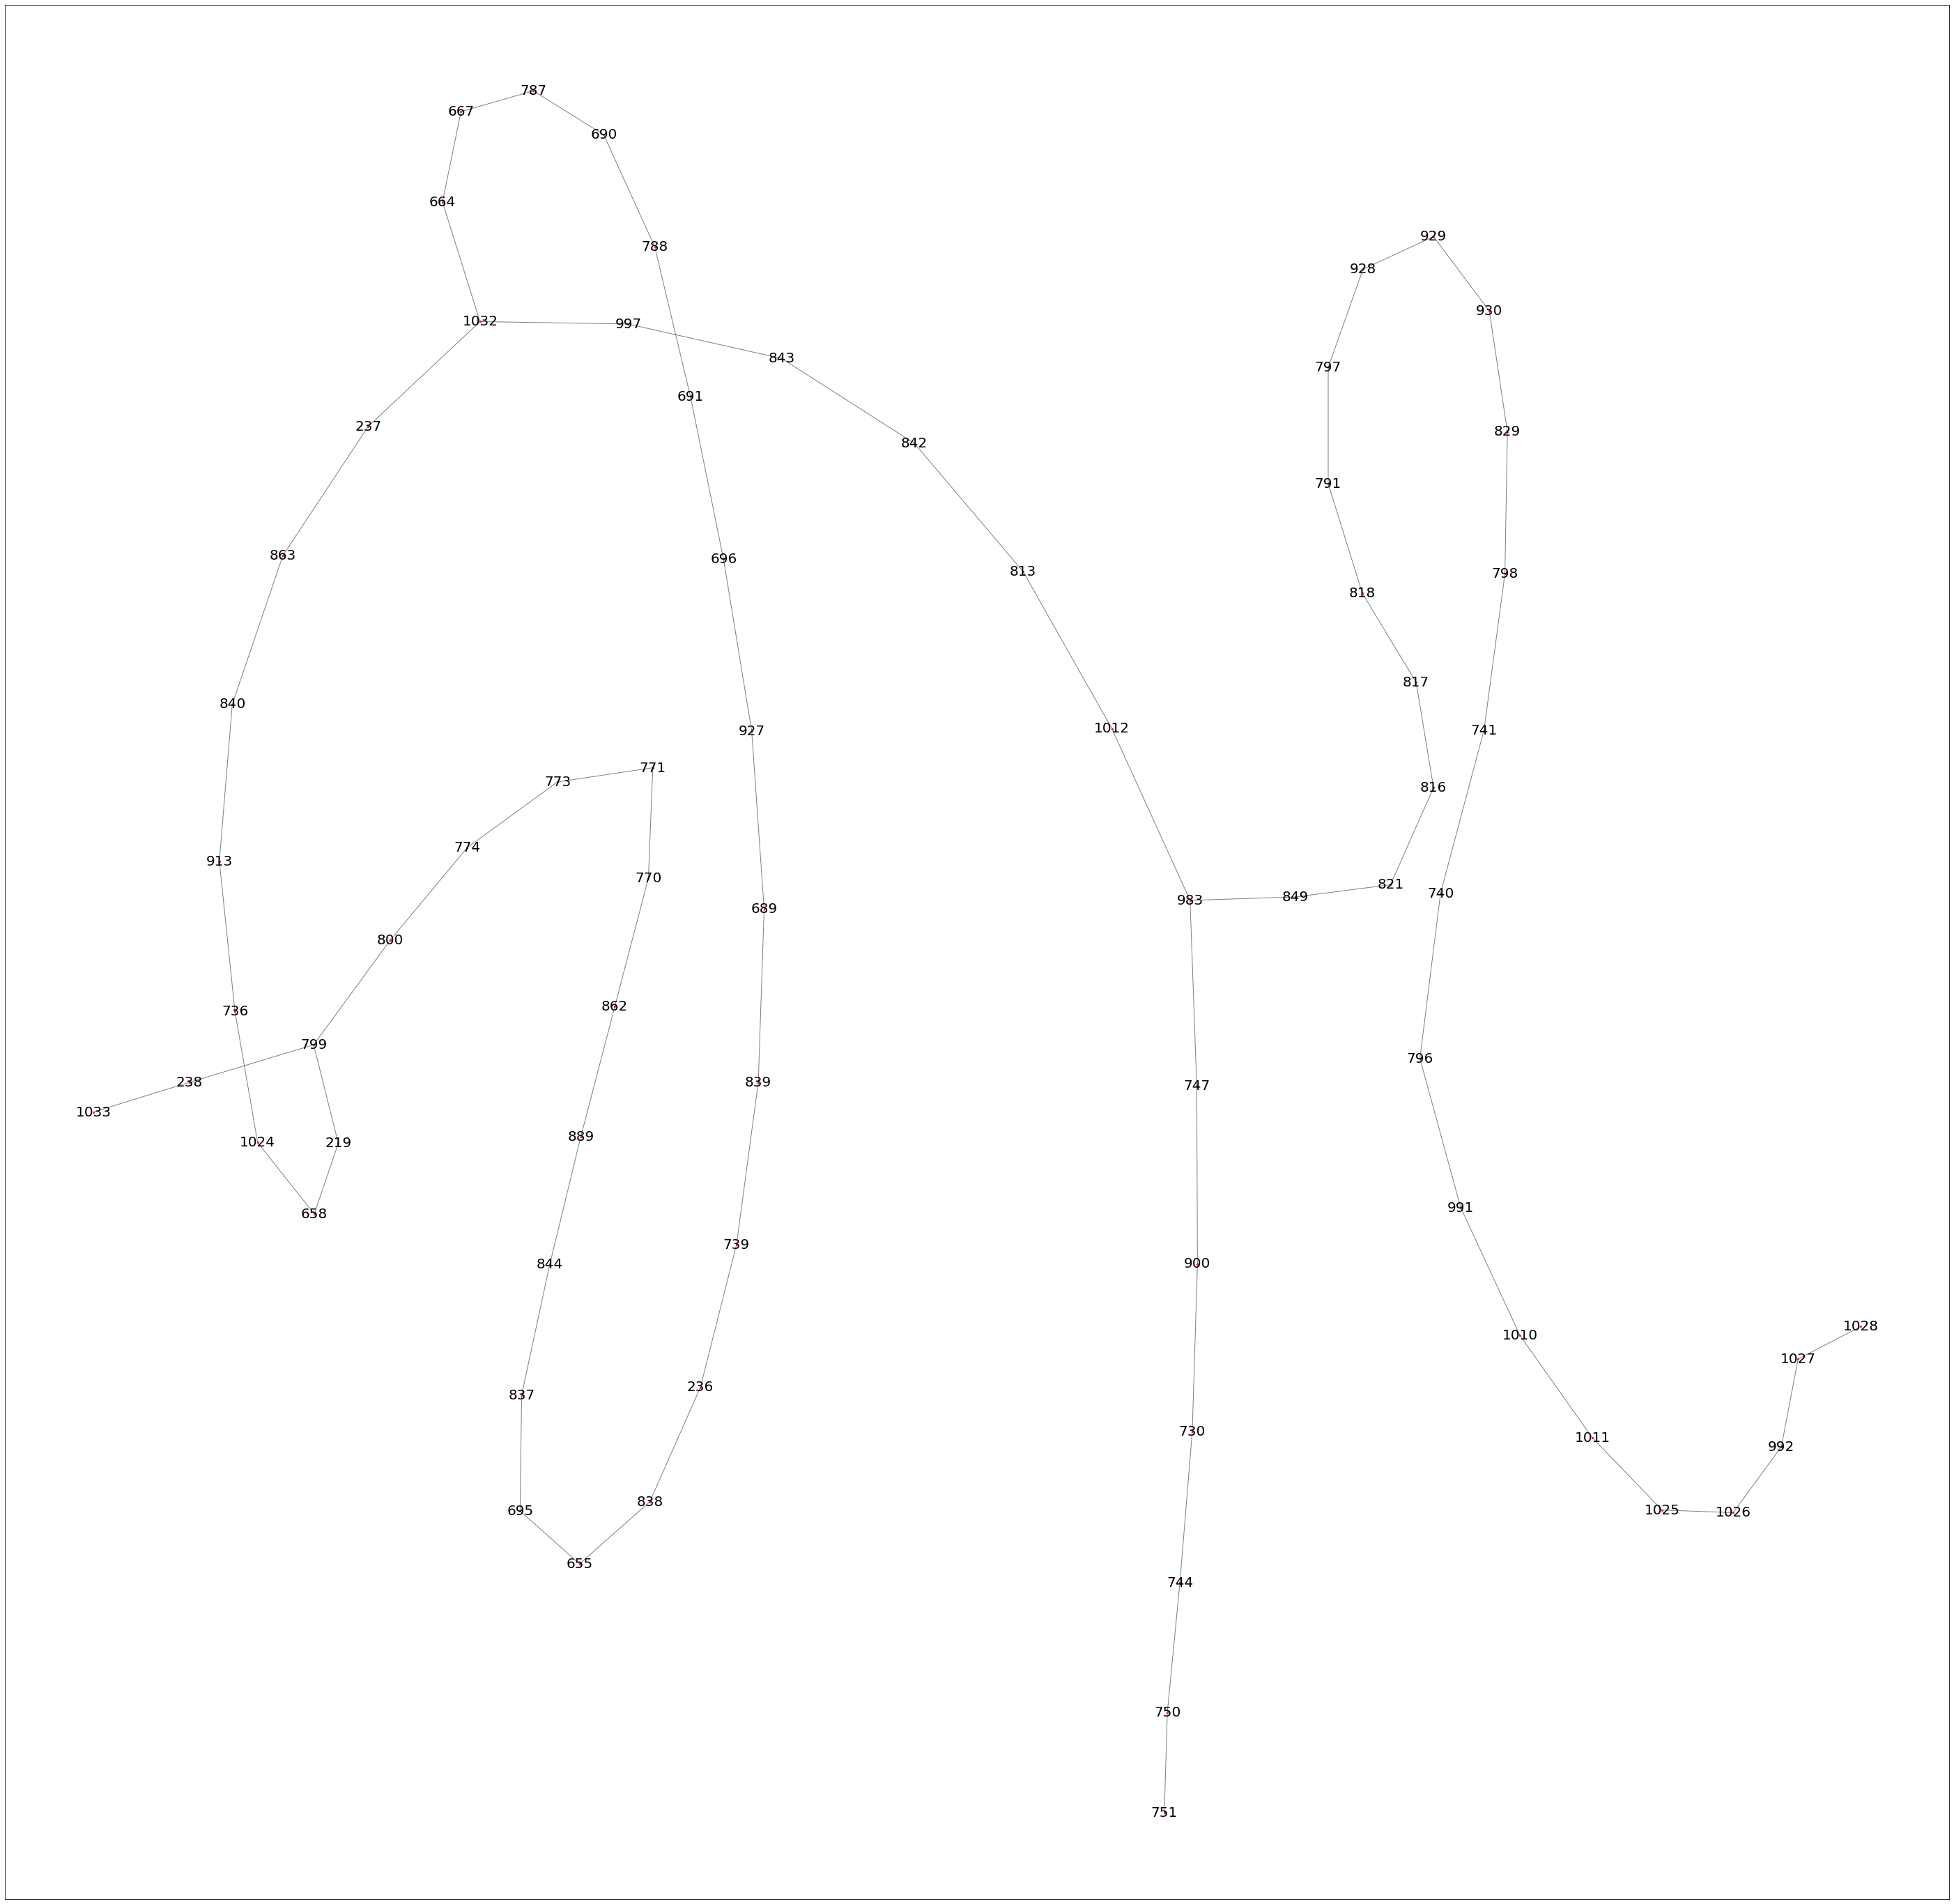

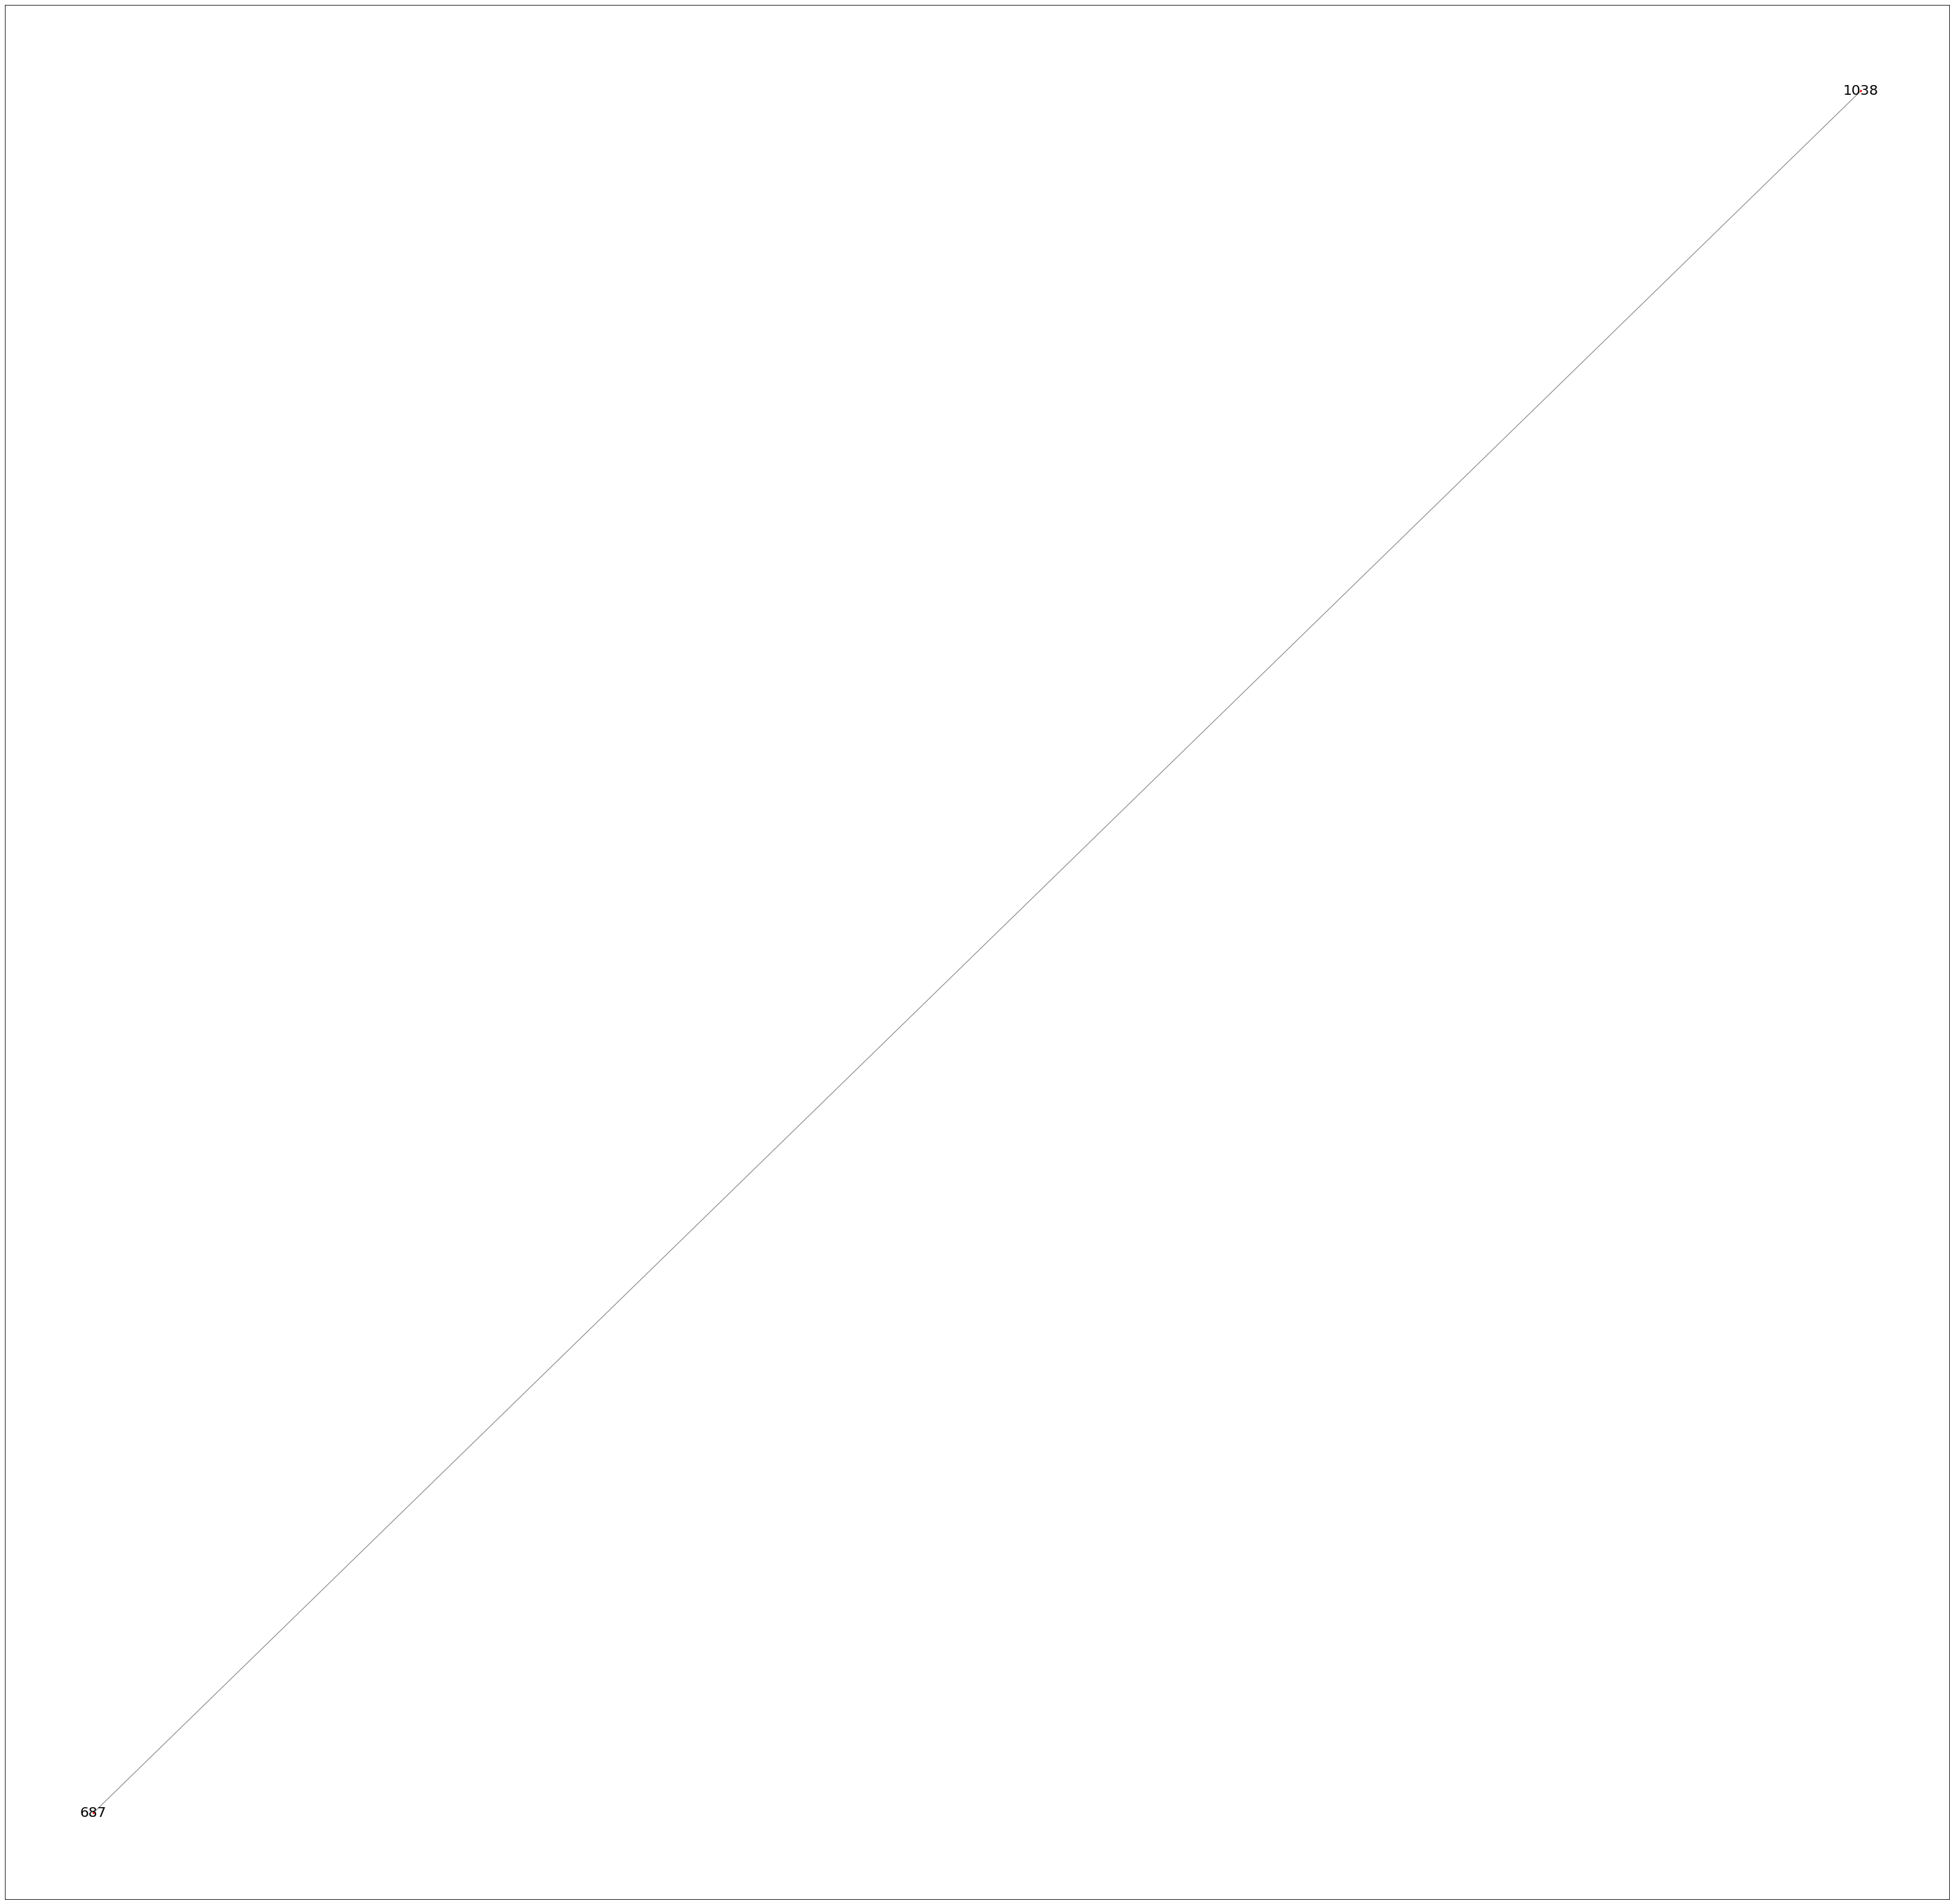

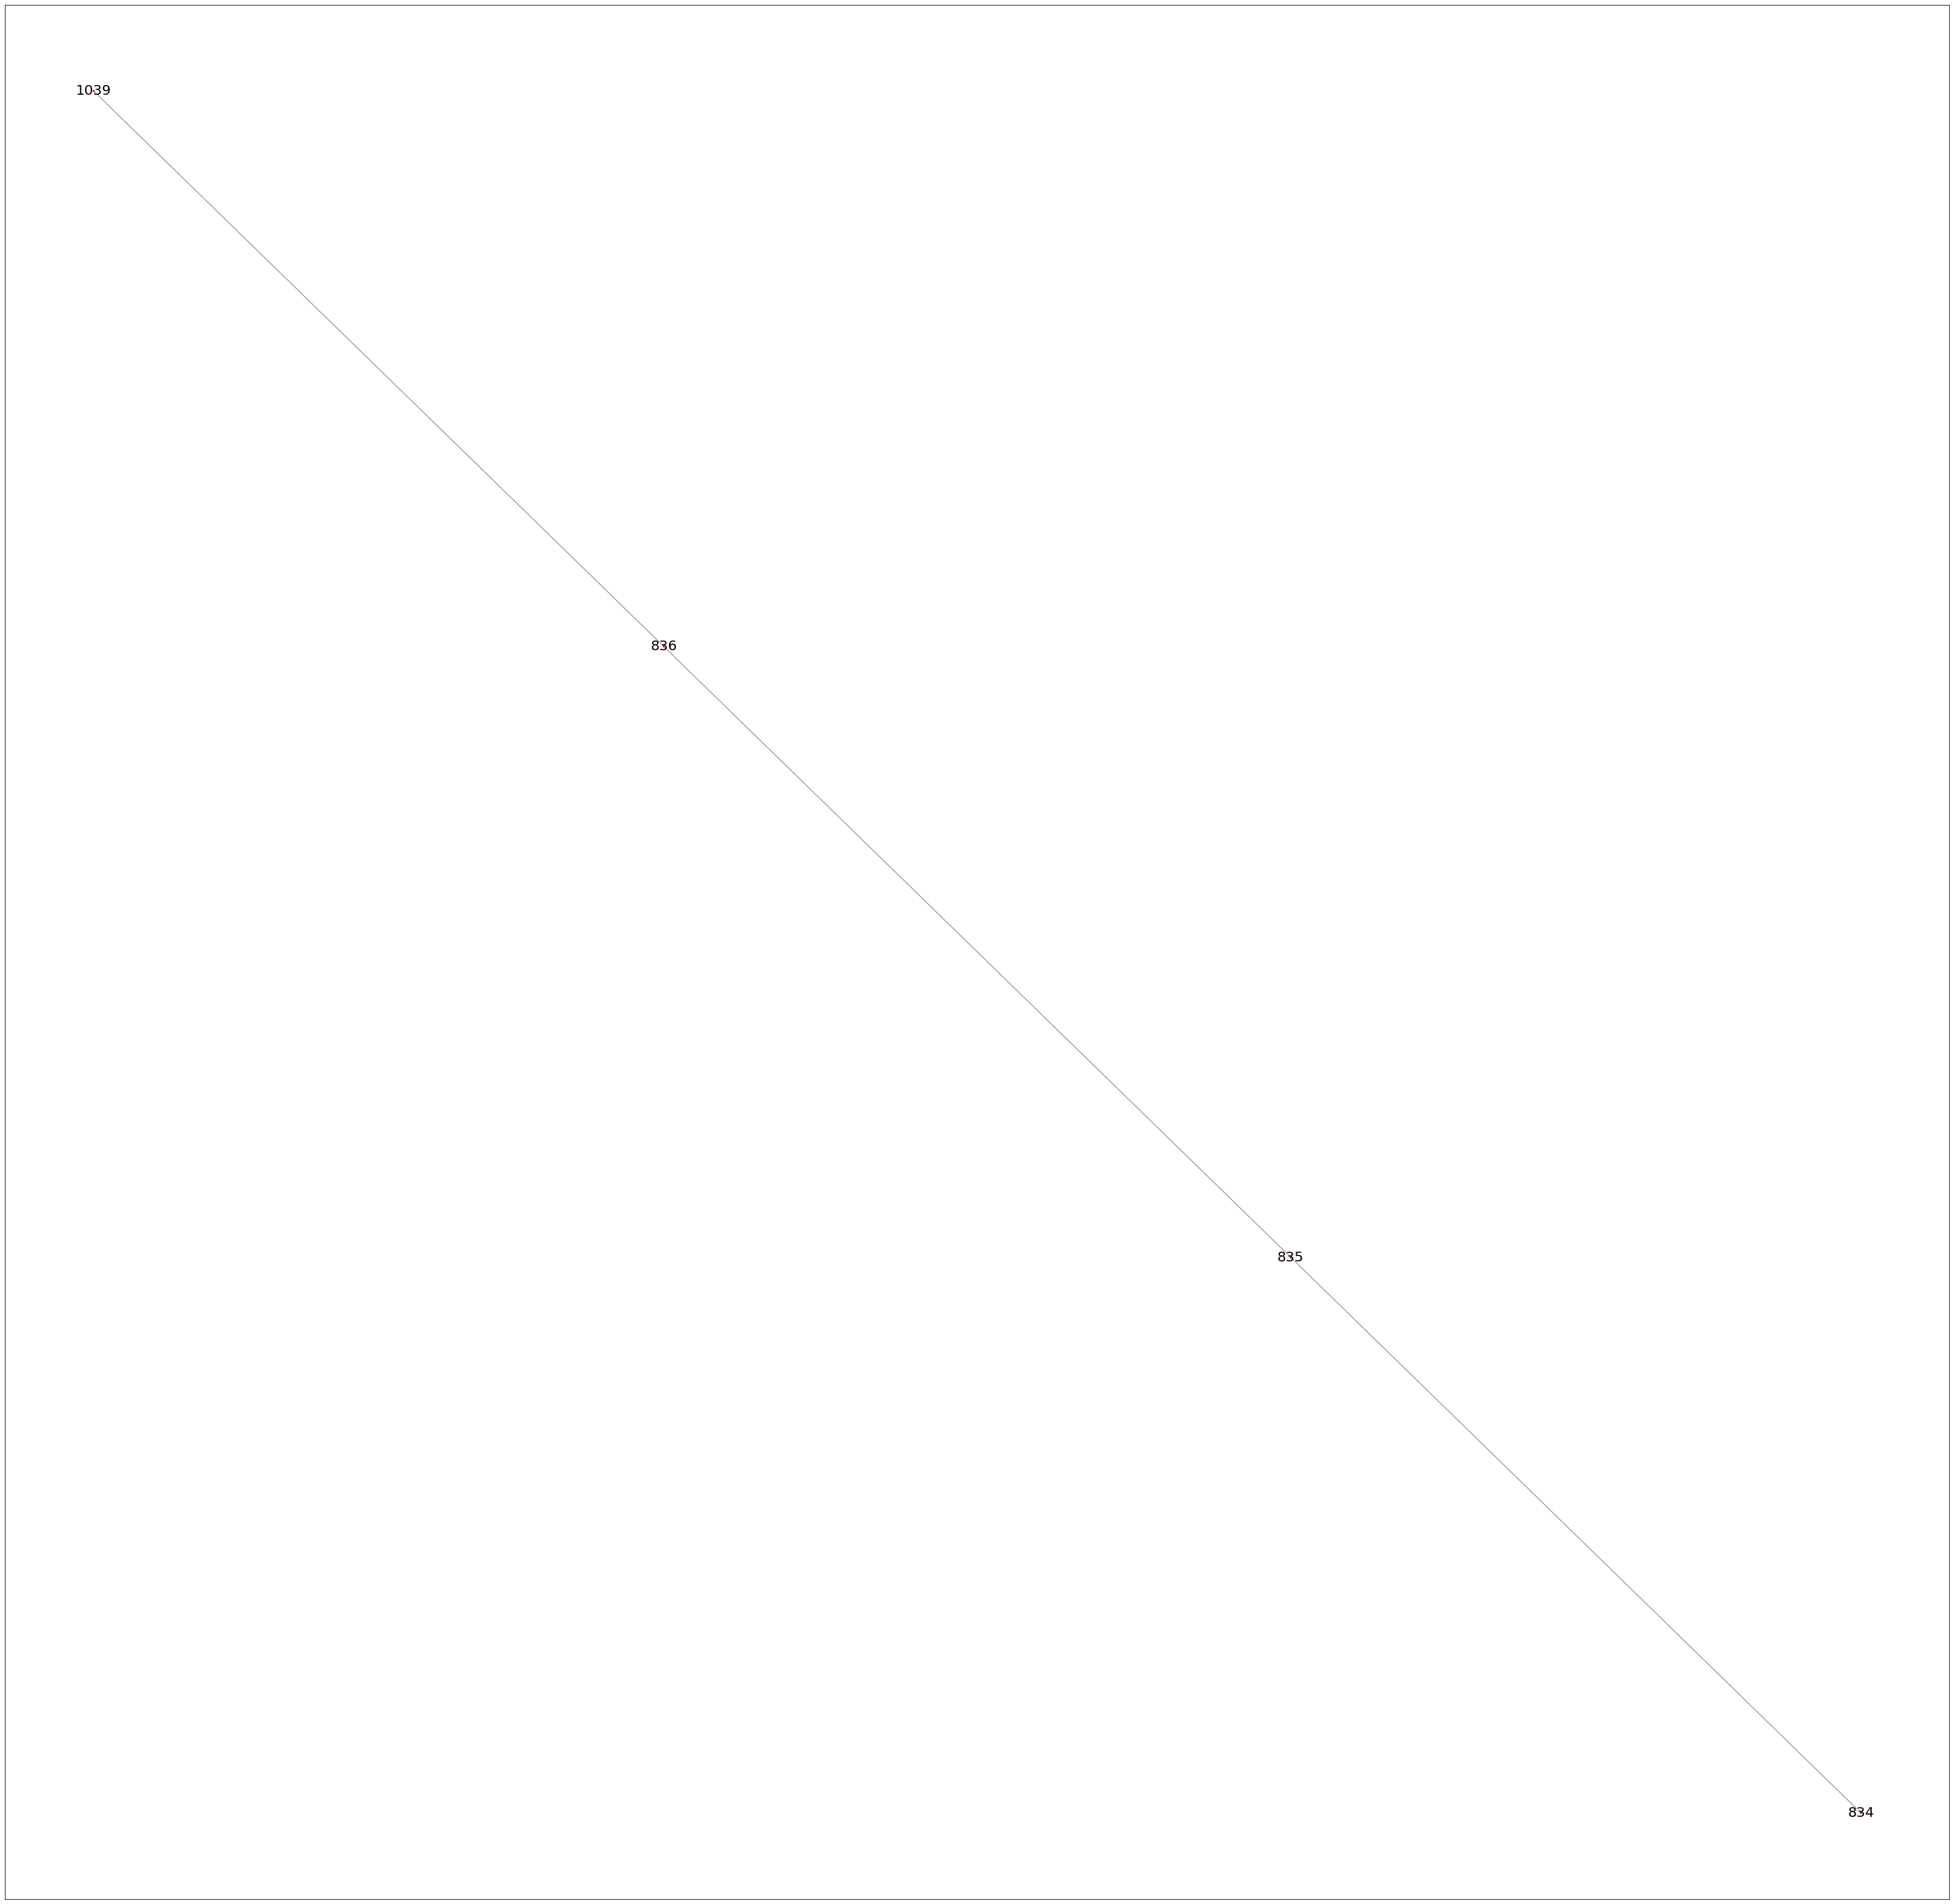

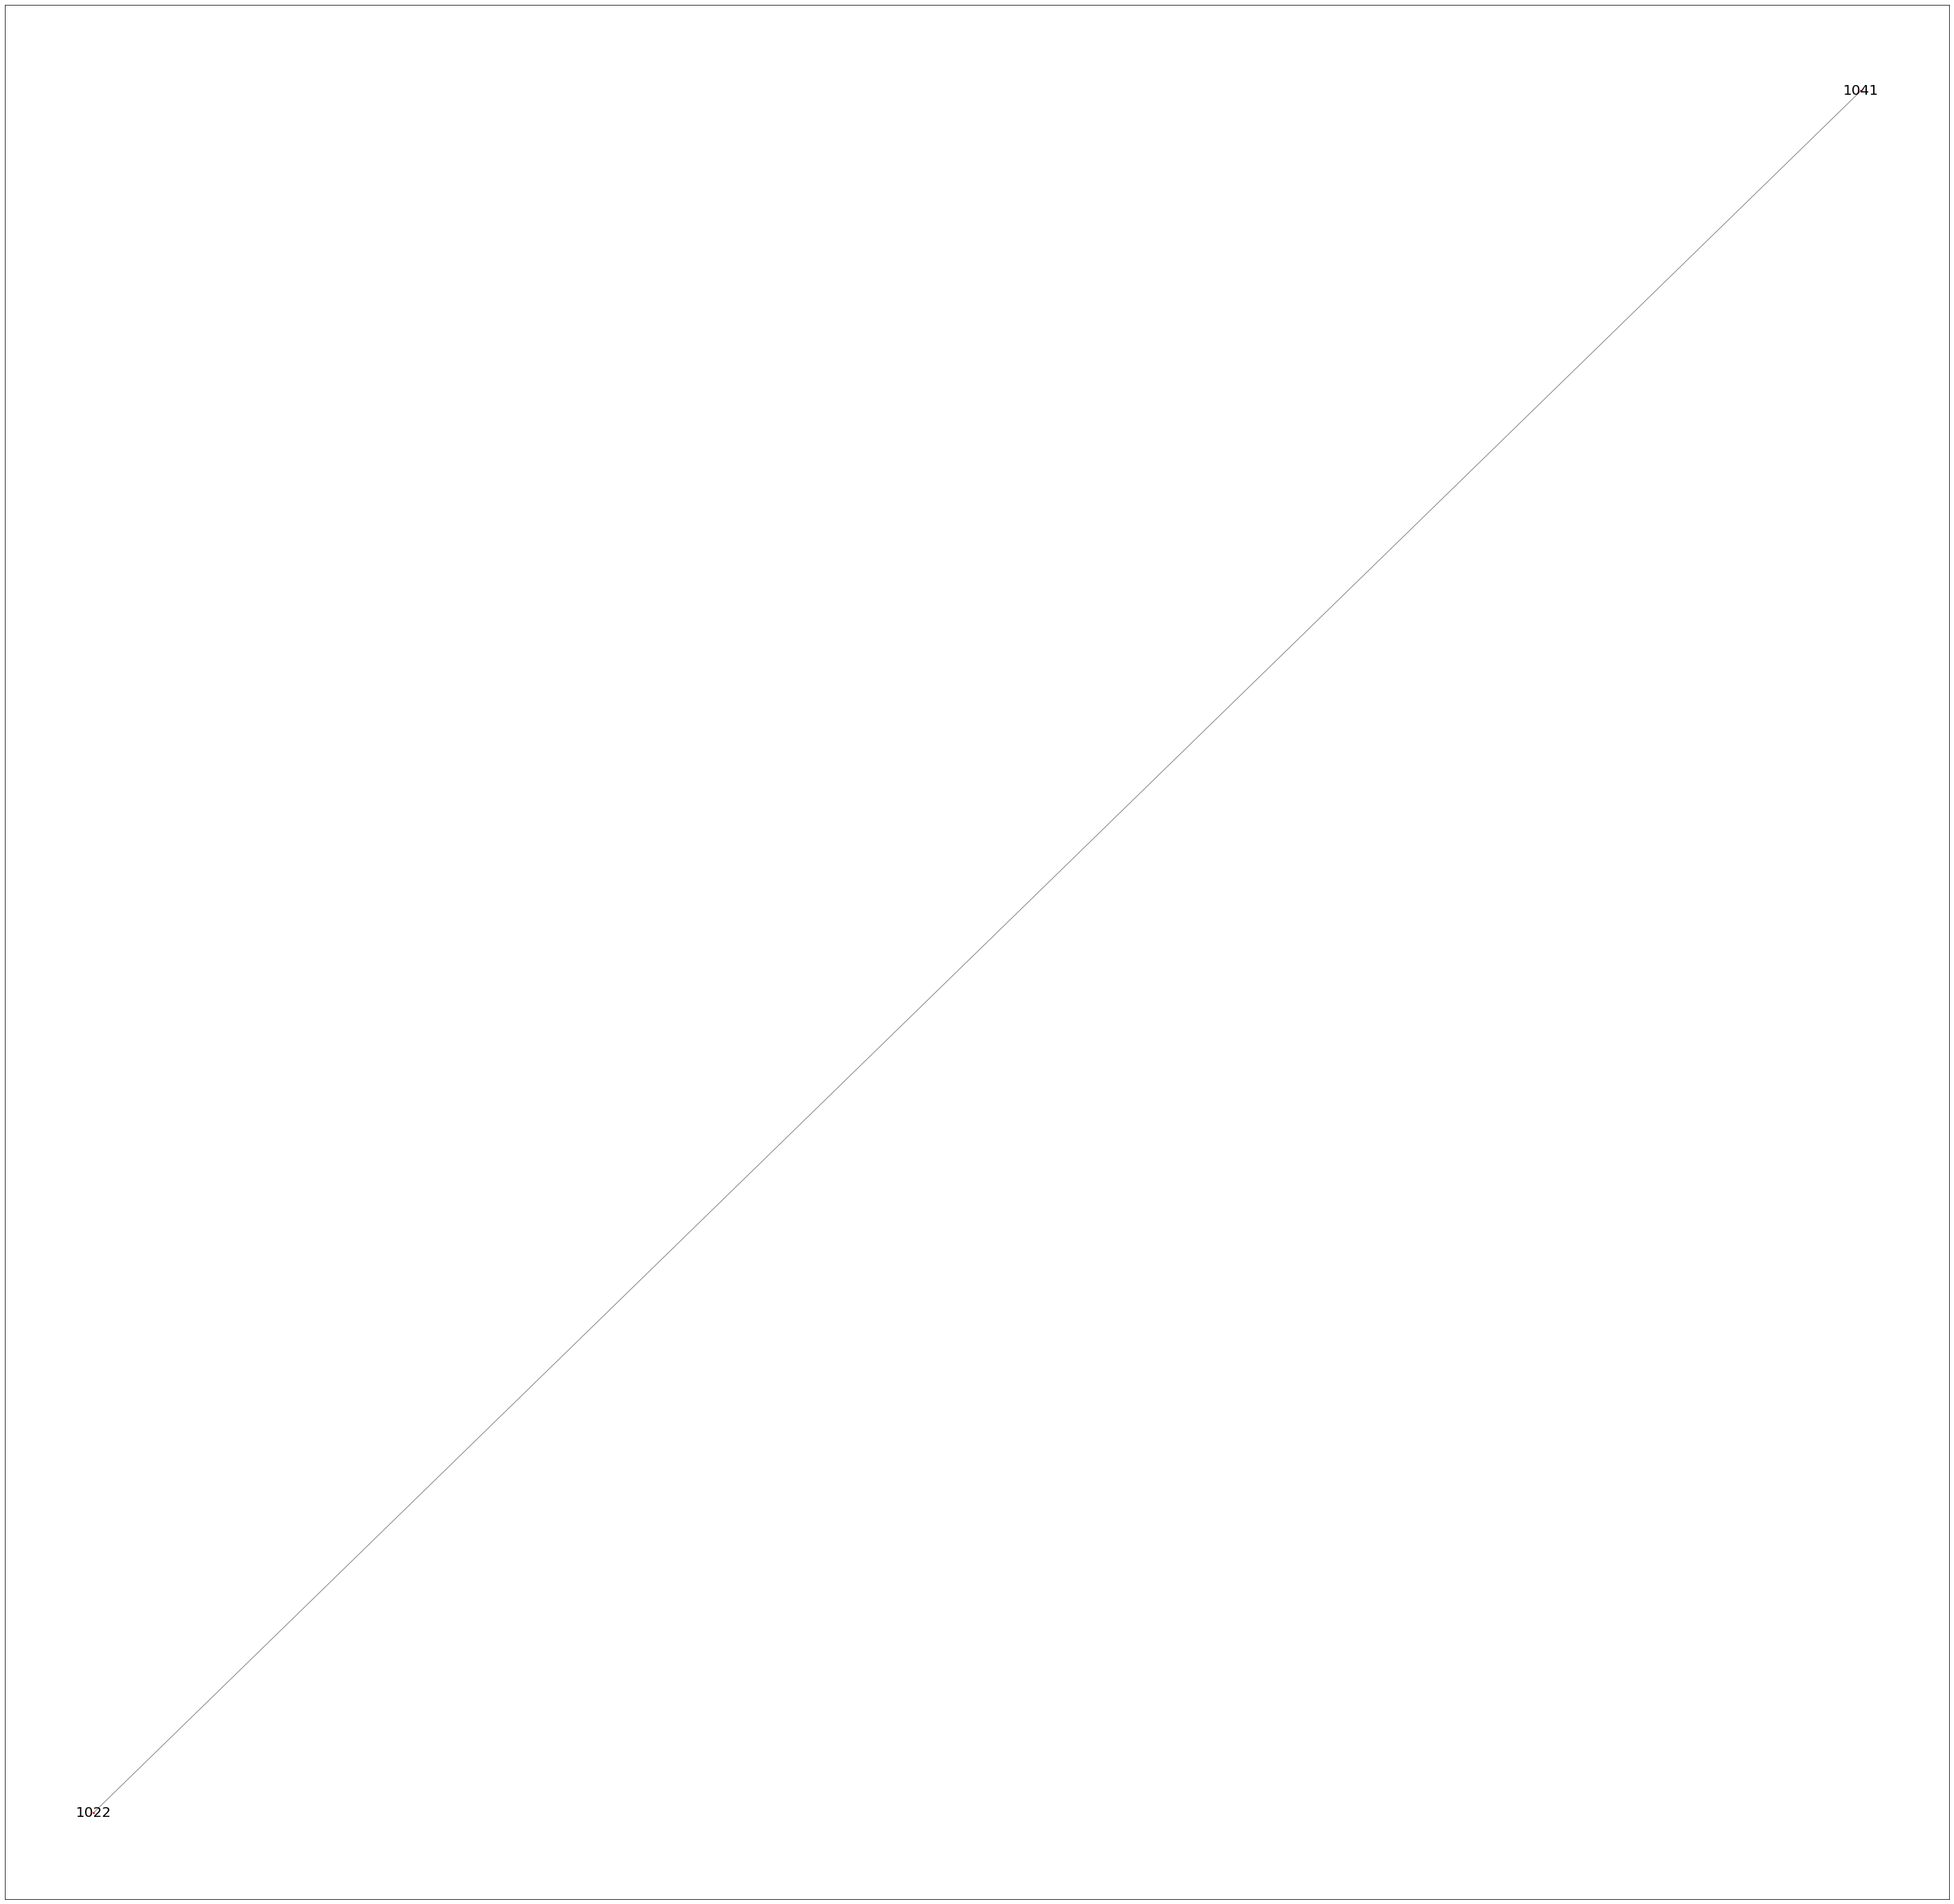

In [19]:
i = 0

for subgraph in subgraphs:
    plt.figure(figsize=(50,50))
    plt.clf()
    i=i+1
    pos = nx.spring_layout(subgraph)  # positions for all nodes
    nx.draw_networkx_nodes(subgraph, pos,
                       nodelist=None,
                       node_color='r',
                       node_size=5,
                       alpha=0.8)
    nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(subgraph, pos, labels=None, font_size = 20)
    plt.savefig(str(i)+'.png', dpi=100, figsize=(50, 50))